# Getting to know numpy

In [1]:
import numpy as np
# vectors a, b
a = np.array([1., 2., 0.])
b = np.array([3., 3/2, 1.])
# matrix A
A = np.array([[1, 0, 0],
              [0, 2, 0],
              [1, 0, 1]])

answers = [None]*4

# matrix-vector product
answers[0] = (A @ a)
# dot product
answers[1] = np.dot(a, b)
# vector that is perpendicular to both a, b
answers[2] = np.cross(a, b)
# vector x such that Ax = a
answers[3] = np.linalg.solve(A, a)
assert np.array_equal(A @ answers[3], a)

for i in answers:
    print(i)

[1. 4. 1.]
6.0
[ 2.  -1.  -4.5]
[ 1.  1. -1.]


In [2]:
import numpy as np

def slow_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

def faster_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        result.append(np.dot(matrix[r, :], vector))
    return np.array(result)

# Example of using this function
matrix = np.random.rand(3, 3)
vector = np.random.rand(3)
print(slow_matvec(matrix, vector))
print(faster_matvec(matrix, vector))
print(matrix @ vector)

[0.2112637  0.55051726 0.30029686]
[0.2112637  0.55051726 0.30029686]
[0.2112637  0.55051726 0.30029686]


# Testing with asserts

In [3]:
try:
    assert 100 / 3 * 30 == 1000.0
except(AssertionError):
    print("Yep this gives an error")

Yep this gives an error


In [4]:
def tests():
    matrix = np.random.rand(3, 3)
    vector = np.random.rand(3)
    result = matrix @ vector
    assert np.allclose(slow_matvec(matrix, vector), result)
    assert np.allclose(faster_matvec(matrix, vector), result)
    return 1

tests()

1

# Timing a function

In [12]:
from timeit import timeit

def slow_matvec_rand(N):
    matrix = np.random.rand(N, N)
    vector = np.random.rand(N)
    return slow_matvec(matrix, vector)

def faster_matvec_rand(N):
    matrix = np.random.rand(N, N)
    vector = np.random.rand(N)
    return faster_matvec(matrix, vector)

N = 1

def time_matvec():
    t_slow_matvec = timeit("slow_matvec_rand(N)", "from __main__ import slow_matvec_rand, N", number=1000)
    t_faster_matvec = timeit("faster_matvec_rand(N)", "from __main__ import faster_matvec_rand, N", number=1000)
    return([t_slow_matvec, t_faster_matvec])

for N in [2,10,100]:
    print(time_matvec())

[0.04839099999998098, 0.03701159999997117]
[0.12861199999997552, 0.04966839999997319]
[9.033359799999971, 0.5833600000000274]


# Plotting with matplotlib

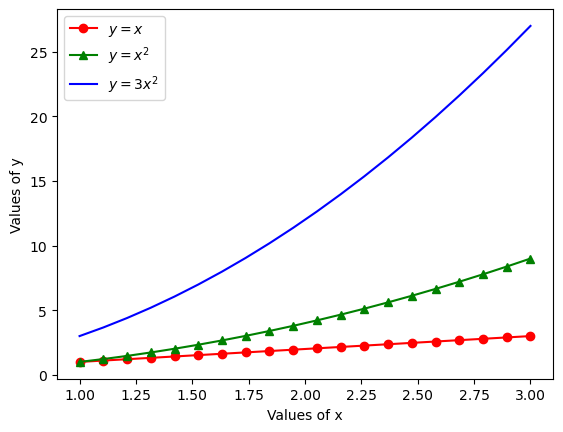

In [8]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

x = np.linspace(1, 3, 20)
y0 = x
y1 = x ** 2
y2 = 3 * x ** 2

plt.plot(x, y0, "ro-")
plt.plot(x, y1, "g^-")
plt.plot(x, y2, "b-")

plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.legend(["$y=x$", "$y=x^2$", "$y=3x^2$"])

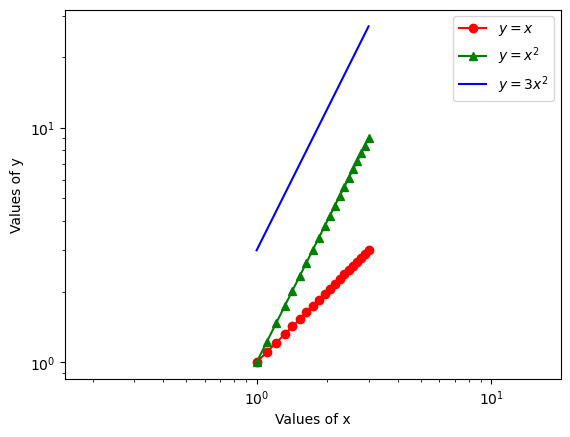

In [9]:
plt.plot(x, y0, "ro-")
plt.plot(x, y1, "g^-")
plt.plot(x, y2, "b-")
plt.xscale("log")
plt.yscale("log")
plt.axis("equal")

plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.legend(["$y=x$", "$y=x^2$", "$y=3x^2$"])

The curves turn into lines in a log-log plot. This is because for the equation $y = ax^b$, then applying $\log$ to both sides gives

$$\begin{aligned}
\log y &= \log(ax^b) \\
       &= \log a + \log(x^b) \\
       &= \log a + b\log x
\end{aligned}$$

which is in the form $y = mx + b$ with $y := \log y$, $x := \log x$, gradient $b$ and y-intercept $\log a$.

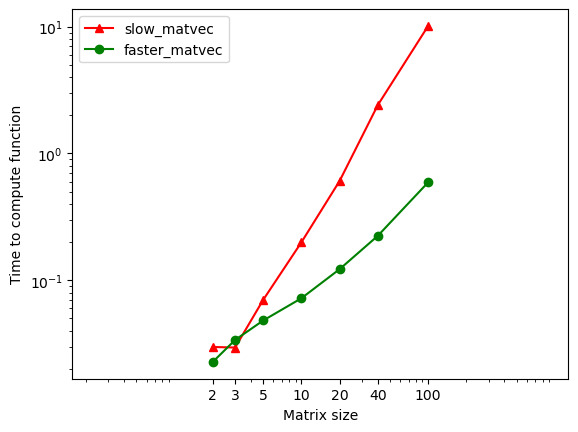

In [15]:
sizes = [2,3,5,10,20,40,100]
times_slow = []
times_faster = []

for N in sizes:
    times_slow.append(time_matvec()[0])
    times_faster.append(time_matvec()[1])

plt.plot(sizes, times_slow, "r^-")
plt.plot(sizes, times_faster, "go-")
plt.xscale("log")
plt.yscale("log")
plt.axis("equal")

plt.xticks(sizes, sizes)
plt.xlabel("Matrix size")
plt.ylabel("Time to compute function")
plt.legend(["slow_matvec", "faster_matvec"])